# Power-law rotation curve
Okay dus we hebben een rotation curve die eruit ziet als:
$$
  \Theta(R)=\Theta_{\odot}a_1\left(\frac{R}{R_{\odot}}\right)^{a_2}
$$
Waar $\Theta$ de _tangential velocity_ is, niet de volledige rotational velocity.
Deze volgt uit:
$$
  v(z, R)=\sin l\cos b\left(\frac{R_{\odot}}{R}\Theta(z,R)-\Theta_{\odot}\right)
$$
Wij meten dus $v$ en niet direct $\Theta$. Om $\Theta$ uit v te vinden, gebruiken
we:
$$
  \frac{R_{\odot}}{R}\Theta(z,R)=\frac{v(R,z)}{\sin l\cos b}+\Theta_{\odot}
$$
Dus:
$$
  \left(\frac{R}{R_{\odot}}\right)^{a_2-1}=\frac{v(R,z)}{a_1\Theta_{\odot}\sin l\cos b}+\frac{1}{a_1}
$$
en uiteindelijk:
$$
  R(v)=R_{\odot}\sqrt[a_2-1]{\frac{v(R,z)}{a_1\Theta_{\odot}\sin l\cos b}+\frac{1}{a_1}}
$$

In [2]:
import numpy as np

In [3]:
#Matplotlib configuration
from matplotlib import pyplot as plt

#A4 tufte layout paper figure sizes
MARGIN_FIG = lambda scale: (1.99, 1.99*scale)
MAIN_FIG = lambda scale: (4.18, 4.18*scale)
FULL_FIG = lambda scale: (6.64, 6.64*scale)

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='Fira Code')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#Other matplotlib configuration
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Fira Code'
plt.rcParams['mathtext.it'] = 'Fira Code'
plt.ioff()

In [4]:
#position of the sun
R0 = 8.34
T0 = 240

#line of sight
l = 80.75 * np.pi / 180
b = 0

#rot curve parameters
a1 = 1.022
a2 = 0.0803

def rot_curve(R):
  return T0 * a1 * (R/R0)**a2
def inv_rot_curve(T):
  return R0 * (T / (T0 * a1))**(1/a2)
def v(T, R):
  return np.sin(l)*np.cos(b)*((R0*T/R) - T0)
def T(v,R):
  return (R/R0) * (v/(np.sin(l)*np.cos(b)) + T0)
def rot_v(R):
  return v(rot_curve(R), R)
def inv_rot_v(v):
  return R0 * (v / (a1*T0*np.sin(l)*np.cos(b)) + 1/a1)**(a2-1)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


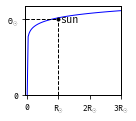

In [5]:
#plot basic rotation curve
R_fake = R0*np.linspace(0, 3, 100)
T_fake = rot_curve(R_fake)

plt.figure(figsize=MARGIN_FIG(0.9))
plt.plot(R_fake, T_fake, color='b')
plt.ylim(0)
plt.xlim(-0.5, 3*R0)

#add lines for the sun
plt.vlines(R0, 0, T0, linestyles='--', colors='black')
plt.hlines(T0, -10, R0, linestyles='--', colors='black')
plt.scatter(R0, T0, marker='.', color='black', zorder=15)
plt.annotate('sun', (R0+3, T0-10), ha='center')

#set ticks
x_ticks = [0, R0, 2*R0, 3*R0]
x_labels = ['0', '$R_{\odot}$', '$2R_{\odot}$', '$3R_{\odot}$']
y_ticks = [0, T0]
y_labels = ['0', '$\Theta_{\odot}$']
plt.xticks(x_ticks, labels=x_labels)
plt.yticks(y_ticks, labels=y_labels)
plt.savefig('../figs/abs_rotation_curve.pdf', transparent=True, bbox_inches="tight", pad_inches=0)
plt.show()

In [8]:
#locations of the three spiral arms
V_CYGNUS = 4.57522965e-01
V_PERSEUS = -4.02488372e+01
V_NORMA = -7.34834338e+01
V_OUTER = -5.20972297e+01

SIG_CYGNUS = 9.62327902e+00
SIG_PERSEUS = 5.95626103e+00
SIG_NORMA = 6.46930123e+00
SIG_OUTER = 1.12561854e+01

R_CYGNUS = R0
R_PERSEUS = 8.574722418601473
R_NORMA = 9.640986215770878
R_OUTER = 14.5

T_CYGNUS = T(V_CYGNUS, R_CYGNUS)
T_PERSEUS = T(V_PERSEUS, R_PERSEUS)
T_NORMA = T(V_NORMA, R_NORMA)
T_OUTER = 306.6924310122165
print(T_CYGNUS, T_PERSEUS, T_NORMA)

N_CHANNELS = 272
V_STEP = -0.82446
V_REF = -60

#snelheid is TOV zon
v = np.linspace(0, V_STEP*N_CHANNELS, num=N_CHANNELS)
v = v - (v[145] - V_REF)

240.4635508098115 204.82779361355563 191.37291193235


/tmp/ipykernel_12934/4224772385.py:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.errorbar(R_OUTER, T_OUTER,


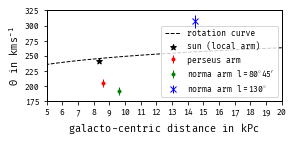

rot. curve velocity perseus=245.82727966643
rot. curve velocity norma=248.15181558924053


In [12]:
R = R0*np.linspace(0, 3, 100)

plt.figure(figsize=MAIN_FIG(0.5))
plt.plot(R, rot_curve(R), label="rotation curve", linestyle='--', color='black')

plt.scatter(R_CYGNUS, T_CYGNUS,
            label="sun (local arm)",
            color='black',
            marker='*',
            zorder=15)
plt.errorbar(R_PERSEUS, T_PERSEUS,
            yerr=SIG_PERSEUS,
            fmt='.',
            label="perseus arm",
            color='r',
            zorder=15)
plt.errorbar(R_NORMA, T_NORMA,
            yerr=SIG_NORMA,
            fmt='.',
            label="norma arm $l=80^{\circ}45'$",
            color='g',
            zorder=15)
plt.errorbar(R_OUTER, T_OUTER,
            yerr=SIG_OUTER,
            fmt='.',
            label="norma arm $l=130^{\circ}$",
            color='b',
            marker='x',
            zorder=15)

plt.legend(loc='lower right')
plt.xlabel("galacto-centric distance in $kPc$")
plt.ylabel("$\Theta$ in $kms^{-1}$")

plt.xlim(5, 20)
plt.ylim(175, 325)
plt.yticks([175,200,225,250,275,300,325])
plt.xticks(np.arange(5,21))

plt.savefig('../figs/rot_curve_with_geom.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.show()

print(f"rot. curve velocity perseus={rot_curve(R_PERSEUS)}")
print(f"rot. curve velocity norma={rot_curve(R_NORMA)}")

In [7]:
#aight calculate distances
R = inv_rot_v(v)
cosl = np.cos(l)
d = cosl*R0 + np.sqrt(R**2 -(1-cosl**2)*R0**2)
#set NaN channels to zero distance :3
d[np.isnan(d)] = 0.0

C:\Users\rawol\AppData\Local\Temp\ipykernel_15476\2175633666.py:4: RuntimeWarning: invalid value encountered in sqrt
  d = cosl*R0 + np.sqrt(R**2 -(1-cosl**2)*R0**2)


C:\Users\rawol\AppData\Local\Temp\ipykernel_15476\3721742139.py:19: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(*vr_cygnus, color='red', alpha=0.2, edgecolor=0.0)
C:\Users\rawol\AppData\Local\Temp\ipykernel_15476\3721742139.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(*vr_perseus, color='blue', alpha=0.2, edgecolor=0.0)
C:\Users\rawol\AppData\Local\Temp\ipykernel_15476\3721742139.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(*vr_norma, color='green', alpha=0.2, edgecolor=0.0)


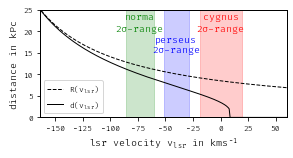

59.98783173431734 -164.26528826568267


In [8]:
SLICE_CYGNUS = np.ma.masked_where(
  (v >= V_CYGNUS - 2*SIG_CYGNUS) & (v <= V_CYGNUS + 2*SIG_CYGNUS), v
).mask.astype(bool)
SLICE_PERSEUS = np.ma.masked_where(
  (v >= V_PERSEUS - 2*SIG_PERSEUS) & (v <= V_PERSEUS + 2*SIG_PERSEUS), v
).mask.astype(bool)
SLICE_NORMA = np.ma.masked_where(
  (v >= V_NORMA - 2*SIG_NORMA) & (v <= V_NORMA + 2*SIG_NORMA), v
).mask.astype(bool)

plt.figure(figsize=MAIN_FIG(0.55))
plt.plot(v, R, linestyle='--', color='black', zorder=15, label='$R(v_{lsr})$')
plt.plot(v, d, linestyle='-', color='black', zorder=15, label='$d(v_{lsr})$')

vr_cygnus = [v[SLICE_CYGNUS][0], v[SLICE_CYGNUS][-1]]
vr_perseus = [v[SLICE_PERSEUS][0], v[SLICE_PERSEUS][-1]]
vr_norma = [v[SLICE_NORMA][0], v[SLICE_NORMA][-1]]

plt.axvspan(*vr_cygnus, color='red', alpha=0.2, edgecolor=0.0)
plt.axvspan(*vr_perseus, color='blue', alpha=0.2, edgecolor=0.0)
plt.axvspan(*vr_norma, color='green', alpha=0.2, edgecolor=0.0)

#add text for spiral arm spans
plt.text(V_CYGNUS, 20, 'cygnus\n$2\sigma$-range', color='r', horizontalalignment='center')
plt.text(V_PERSEUS, 15, 'perseus\n$2\sigma$-range', color='b', horizontalalignment='center')
plt.text(V_NORMA, 20, 'norma\n$2\sigma$-range', color='g', horizontalalignment='center')

#shared between axes
plt.ylabel("distance in $kPc$")
plt.xlabel("lsr velocity $v_{lsr}$ in $kms^{-1}$")
plt.ylim(0,25)
plt.xlim(np.min(v), np.max(v))

plt.legend(loc='lower left')
plt.savefig('../figs/rot_curve_with_arms')
plt.show()

print(np.max(v), np.min(v))

In [9]:
#last step is to save the velocity channels
np.savetxt("../tmp/distance_channels.csv", R, delimiter=',')
np.savetxt("../tmp/sun_distance_channels.csv", d, delimiter=',')

#and where each spiral arm starts/stops
np.savetxt("../tmp/SLICE_CYGNUS.csv", SLICE_CYGNUS, delimiter=',')
np.savetxt("../tmp/SLICE_PERSEUS.csv", SLICE_PERSEUS, delimiter=',')
np.savetxt("../tmp/SLICE_NORMA.csv", SLICE_NORMA, delimiter=',')

In [10]:
print(R[SLICE_PERSEUS])
print(d[SLICE_CYGNUS])

[ 9.57558646  9.61070206  9.64608753  9.68174604  9.71768081  9.7538951
  9.79039224  9.82717559  9.86424859  9.90161472  9.93927752  9.97724058
 10.01550757 10.0540822  10.09296824 10.13216953 10.17168999 10.21153357
 10.25170431 10.29220633 10.33304378 10.37422091 10.41574205 10.45761157
 10.49983395 10.54241372 10.58535551 10.62866402 10.67234404]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.98969024 2.26114209 2.47091086 2.64902904
 2.80709391 2.95103847 3.08437935 3.20940319 3.32769529 3.4404079
 3.5484095  3.65237386 3.75283606 3.8502295  3.94491098 4.03717847
 4.12728386 4.21544239 4.30183972 4.38663737 4.46997692 4.55198336
 4.63276766 4.71242896 4.79105627 4.86872991 4.94552266 5.02150077
 5.09672474 5.17125007 5.24512782 5.31840511 5.39112559]


In [13]:
#pixel size
dl = 5e-3 * np.pi / 180
px_size = d * dl

print(f'Perseus arm distance: {round(np.min(d[SLICE_PERSEUS]), 2)}-{round(np.max(d[SLICE_PERSEUS]), 2)}')
print(f'Outer arm distance: {round(np.min(d[SLICE_NORMA]), 2)}-{round(np.max(d[SLICE_NORMA]), 2)}')

#provide pixel sizes (in Pc)
norma_dx = px_size[SLICE_NORMA]*1000
perseus_dx = px_size[SLICE_PERSEUS]*1000

np.savetxt('../tmp/PERSEUS_DDX.csv',
  np.array([d[SLICE_PERSEUS], np.array(perseus_dx)]).transpose(),
  delimiter=','
)

print(f'Px min/max: {round(np.min(px_size*1000), 3)}/{round(np.max(px_size*1000), 2)}')
print(f'Outer arm min:{round(np.min(norma_dx), 2)}, max:{round(np.max(norma_dx), 2)}')
print(f'Perseus arm min:{round(np.min(perseus_dx), 2)}, max:{round(np.max(perseus_dx), 2)}')

Perseus arm distance: 6.23-8.13
Outer arm distance: 8.9-11.22
Px min/max: 0.0/2.2
Outer arm min:0.78, max:0.98
Perseus arm min:0.54, max:0.71
